In [1]:
import pandas as pd # manipulation et analyse des données
import numpy as np # aide au prétraitement des données
import matplotlib.pyplot as plt # visualiser le meilleur ajustement en corrélation
%matplotlib inline # trace la sortie et le stockage dans le notebook

In [2]:
# Chargement de l'ensemble de données dans Pandas DataFrame 
s_data = pd.read_csv("http://bit.ly/w-data")
print("data imported successfully")
s_data.head(5)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


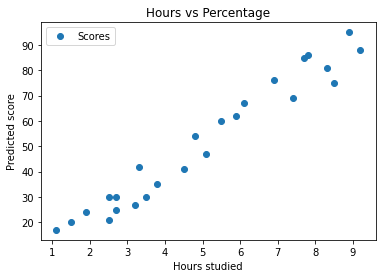

In [5]:
# Tracer la distribution des scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Predicted score')
plt.show()

In [6]:
# Préparation des données
x = s_data.iloc[:, :-1].values # Nombre d'heures
y = s_data.iloc[:, 1].values # Scores

In [7]:
# Divisez les données en Train et Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
# Entraîner l'algorithme 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("Training complete")

Training complete


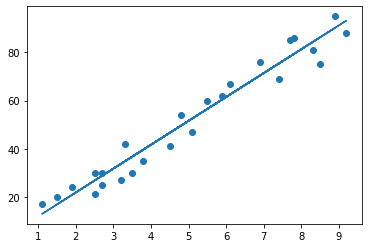

In [9]:
# Tracer la ligne de régression
line = regressor.coef_*x+regressor.intercept_

#Tracer pour les données de test
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [10]:
# Faire des prédictions
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparaison entre l'actuel et le prédit
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# Score prévu si un étudiant étudie pendant 9,25 heures/jour
hours=9.25
hours=np.array(hours).reshape(1, -1)
own_pred=regressor.predict(hours)
print("No of hours={}".format(hours))
print("Predicted score={}".format(own_pred[0]))

No of hours=[[9.25]]
Predicted score=93.69173248737535


In [18]:
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred))

4.183859899002975
